In [4]:
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import shutil

sns.set_style("white")
pd.set_option('display.max_colwidth', None)

# Root directory
root_dir = "Results"

# Get all subdirectories
experiment_dirs = glob.glob(f"{root_dir}/*/*/*/")

# Initialize an empty list to hold all experiment data
experiments_data = []

# Loop over each subdirectory
for exp_dir in experiment_dirs:
    # Config file path
    config_file = f"{exp_dir}config.json"

    # If config file doesn't exist, continue to next directory
    if not glob.glob(config_file):
        continue

    # Load config data
    with open(config_file, 'r') as f:
        config_data = json.load(f)

    config_data['test_samples'] = [int(i) for i in config_data['test_samples']]
    config_data['train_samples'] = [int(i) for i in config_data['train_samples']]

    # Result file patterns
    result_file = f"{exp_dir}result.json"

    if not glob.glob(result_file):
        continue

    # Load result data
    with open(result_file, 'r') as f:
        result_data = json.load(f)

    # Merge config data and result data
    experiment_data = {**config_data, **result_data}

    # Add folder information
    experiment_data["folder"] = '/'.join(exp_dir.split('/')[1:])

    # Append to list
    experiments_data.append(experiment_data)

# Convert list of dictionaries to pandas DataFrame
df = pd.DataFrame(experiments_data)

df.head()

,ex_name,approach,seed,loss_function,epochs,batch_size,learning_rate,neurons,dropout,lambda,...,tgds_ratio,loss_normalized,train_rmse_mean,train_rmse_std,test_rmse_mean,test_rmse_std,folder,loss_tolerance,train_time,best_epoch
0,lambda,Loss_Function,3,two_state,200,128,0.001,32,0.0,1.000,...,0.5,False,149.549,27.473,243.315,0.096,lambda/Loss_Function/type-experiment_date-2023-09-13_19-17-39/,NaN,NaN,NaN
1,lambda,Loss_Function,3,two_state,200,128,0.001,32,0.0,0.001,...,0.5,False,239.078,67.654,347.468,14.514,lambda/Loss_Function/type-experiment_date-2023-09-13_19-04-37/,NaN,NaN,NaN
2,lambda,Loss_Function,4,two_state,200,128,0.001,32,0.0,100.000,...,0.5,False,89.392,4.160,237.206,119.510,lambda/Loss_Function/type-experiment_date-2023-09-13_23-49-43/,NaN,NaN,NaN
3,lambda,Loss_Function,1,two_state,200,128,0.001,32,0.0,1.000,...,0.5,False,199.398,124.526,308.543,56.081,lambda/Loss_Function/type-experiment_date-2023-09-13_12-51-11/,NaN,NaN,NaN
4,lambda,Loss_Function,3,two_state,200,128,0.001,32,0.0,0.100,...,0.5,False,103.706,22.153,133.146,13.209,lambda/Loss_Function/type-experiment_date-2023-09-13_19-04-59/,NaN,NaN,NaN


In [5]:
df_analysis = df[df['ex_name'] == 'sensitivity_analysis_lambda'].copy()

df_analysis.groupby(['lambda']).agg({'test_rmse_mean': ['mean', 'std', 'count']})

test_rmse_mean                 
                     mean        std count
lambda                                    
0.001            265.9634  31.649457     5
0.010            269.8152  67.934363     5
0.100            268.1742  81.960342     5
1.000            267.2608  43.203314     5
10.000           238.1384  42.270087     5
100.000          208.1478  32.230213     5
500.000          183.9142  20.827191     5
1000.000         150.3892  11.448796     5
10000.000        458.6558  34.062727     5
100000.000       712.4700  37.851997     5

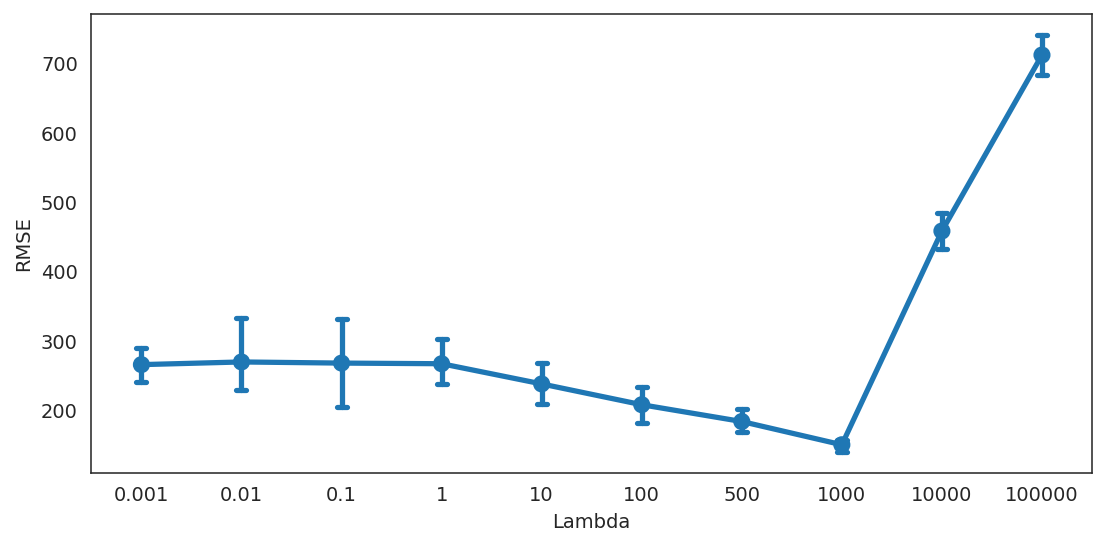

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4), dpi=140)

sns.pointplot(
    ax=axes,
    data=df_analysis,
    x="lambda",
    y="test_rmse_mean",
    capsize=0.1,
).set(xlabel="Lambda", ylabel="RMSE")

current_labels = [float(label.get_text()) for label in axes.get_xticklabels()]
formatted_labels = [f"{int(label)}" if label.is_integer() else f"{label}" for label in current_labels]
axes.set_xticklabels(formatted_labels)

fig.tight_layout()
plt.show()